In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(10)


def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #image of size in figure
    if num>25: num=25
    for i in range(num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx])
        title ="label="+str(labels[idx])
        if len(prediction)>0 : 
            title+=",predict"+str(prediction[idx]) 
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])#not display scale on figure
        idx+=1
    plt.show()

def show_train_history(train_history,train,Validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[Validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
    
    

#______________________________________________________________________________________________________

#loading MNIST database
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#reshape
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D  = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

#normalize
x_train4D_normalize = x_train4D/255
x_test4D_normalize  = x_test4D/255

#label onehot-encoding
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot  = np_utils.to_categorical(y_test)


#______________________________________________________________________________________________________
#bulid model
print('start.....bulid CNN ModeL')
input_size_m = 28
input_size_n = 28
input_size_depth = 1

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

#frist - > convalution and MaxPooling
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape = (input_size_m,input_size_n,input_size_depth),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second -> convalution and MaxPooling
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #solving overfitting

#bulid flatten layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(10,activation='softmax'))
print(model.summary())

#______________________________________________________________________________________________________

#trainning
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
train_history = model.fit( x=x_train4D_normalize, y=y_trainOneHot, validation_split =0.2, epochs=10, batch_size=300, verbose=2)


print('')
print('')
print('show_train_history')
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


#______________________________________________________________________________________________________
#the result
print('')
print('the scores')
scores = model.evaluate(x_test4D_normalize, y_testOneHot)

print('')
print('the prediction')
prediction = model.predict_classes(x_test4D_normalize)

plot_image_labels_prediction(x_test,y_test,prediction,idx=0)
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])



Using TensorFlow backend.


start.....bulid CNN ModeL
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)             

KeyError: 'acc'

10000/10000 [==============================] - 1s 142us/step

the prediction


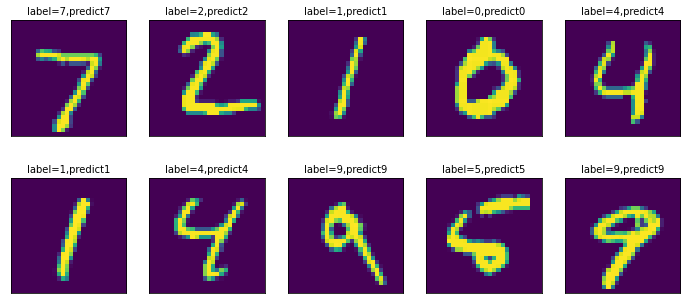

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1129,1,0,0,1,0,1,3,0
2,3,1,1025,1,0,0,0,1,1,0
3,0,0,1,1003,0,3,0,1,2,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,3,0,883,4,0,0,1
6,2,2,0,0,1,2,951,0,0,0
7,0,2,6,1,0,0,0,1018,1,0
8,1,0,0,1,0,1,0,1,969,1


In [2]:
scores = model.evaluate(x_test4D_normalize, y_testOneHot)

print('')
print('the prediction')
prediction = model.predict_classes(x_test4D_normalize)

plot_image_labels_prediction(x_test,y_test,prediction,idx=0)
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

In [3]:
model.save('mnist_cnn_train.h5') 